# Feature Engineering

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv("Heart")
dataset

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,297,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,298,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,299,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,300,59,1,4,160,273.0,0,0,125,0,0.0,2,0


In [3]:
df = pd.DataFrame(dataset)
df

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,297,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,298,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,299,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,300,59,1,4,160,273.0,0,0,125,0,0.0,2,0


In [4]:
df.drop("Unnamed: 0" , axis = 1 , inplace = True)
df

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,59,1,4,160,273.0,0,0,125,0,0.0,2,0


### Handling Outliers 

In [6]:
import numpy as np

def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df[col] = np.where(df[col] < lower, lower,
                    np.where(df[col] > upper, upper, df[col]))
    return df

# Example: apply on key continuous columns
cols_to_cap = ['resting bps', 'cholesterol', 'max heart rate']
df_capped = cap_outliers(df.copy(), cols_to_cap)

df_capped

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140.0,289.0,0,0,172.0,0,0.0,1,0
1,49,0,3,160.0,180.0,0,0,156.0,0,1.0,2,1
2,37,1,2,130.0,283.0,0,1,98.0,0,0.0,1,0
3,48,0,4,138.0,214.0,0,0,108.0,1,1.5,2,1
4,54,1,3,150.0,195.0,0,0,122.0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,68,0,3,120.0,211.0,0,0,115.0,0,1.5,1,1
1044,44,0,3,108.0,141.0,0,1,175.0,0,0.6,1,1
1045,52,1,1,128.0,255.0,0,1,161.0,1,0.0,2,0
1046,59,1,4,160.0,273.0,0,0,125.0,0,0.0,2,0


## Before applying Feature Scaling part we do the simple visualization that which numeric input feature follows Normal distribution. 

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns = ['target']), df.iloc[:,-1] , test_size = 0.2, random_state = 42)

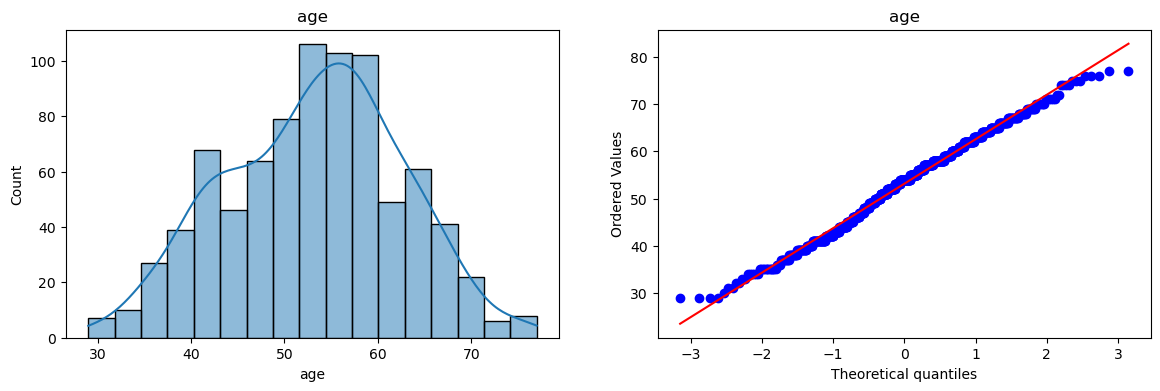

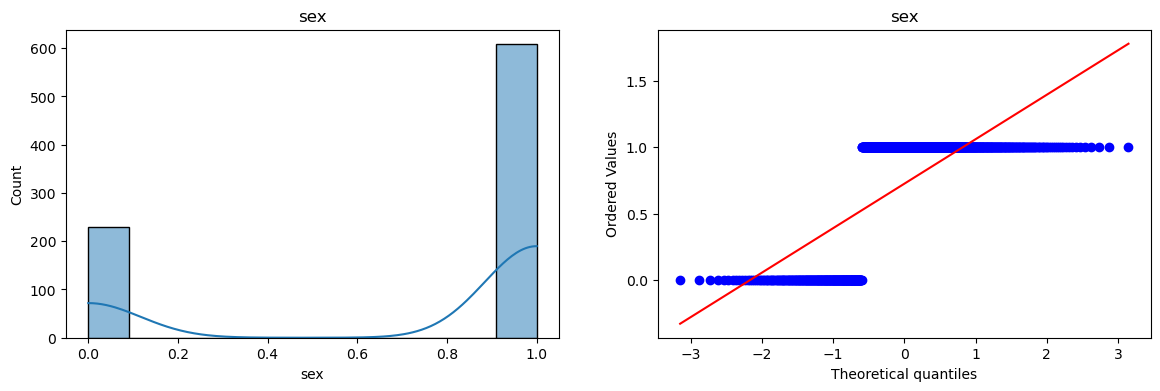

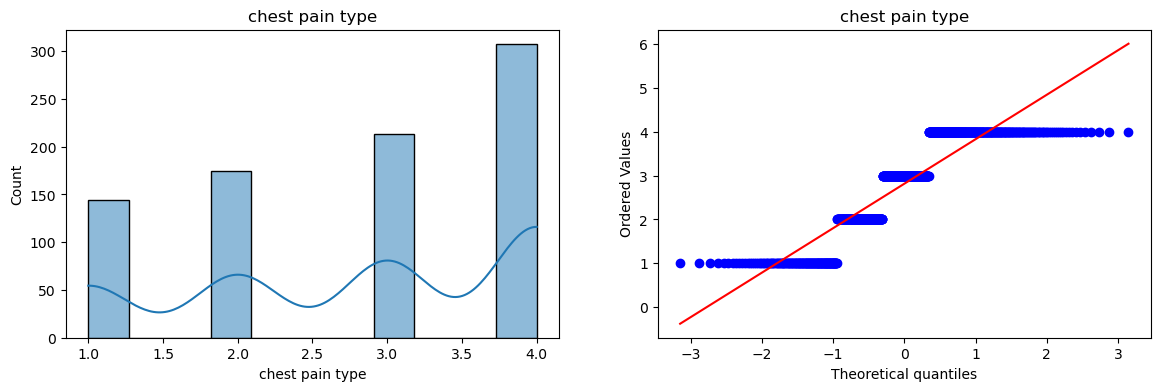

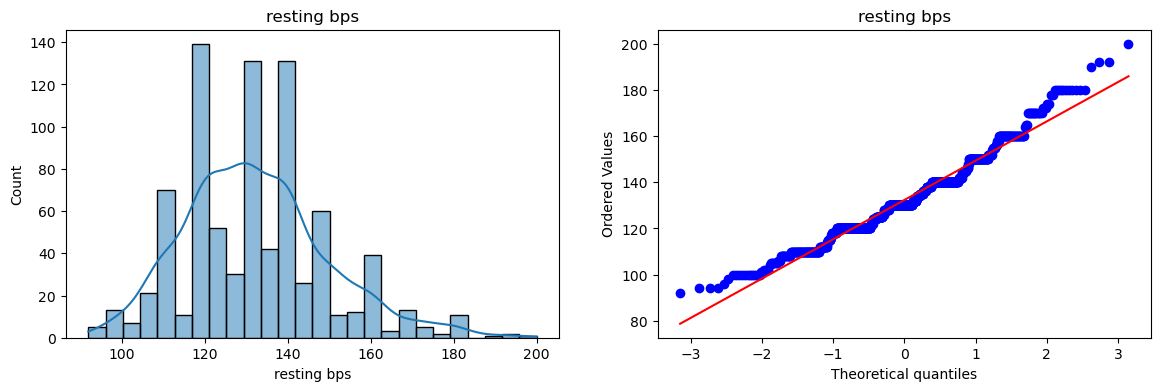

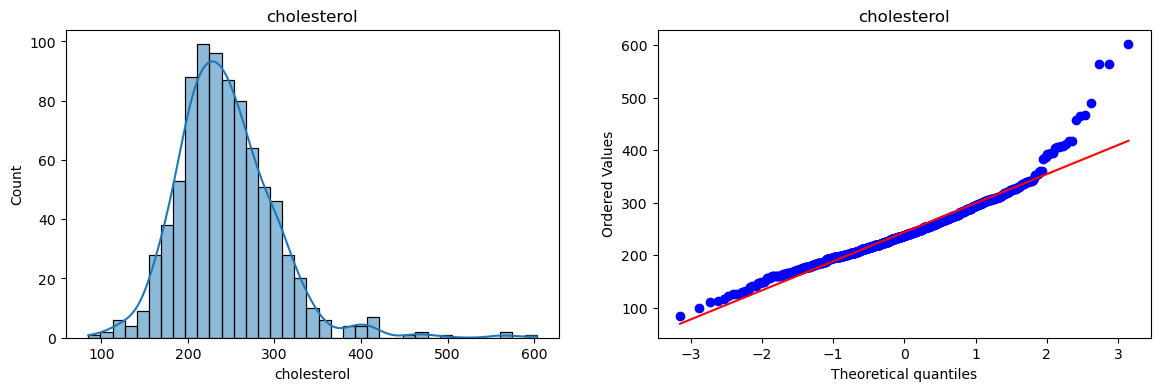

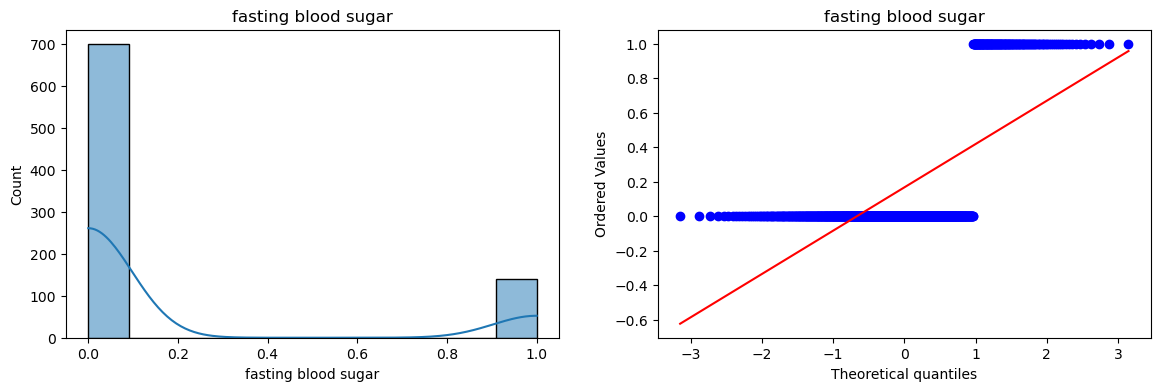

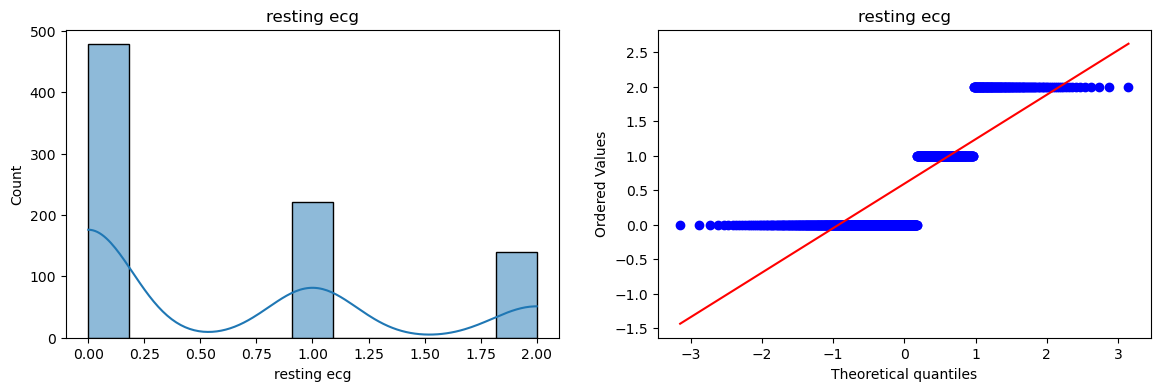

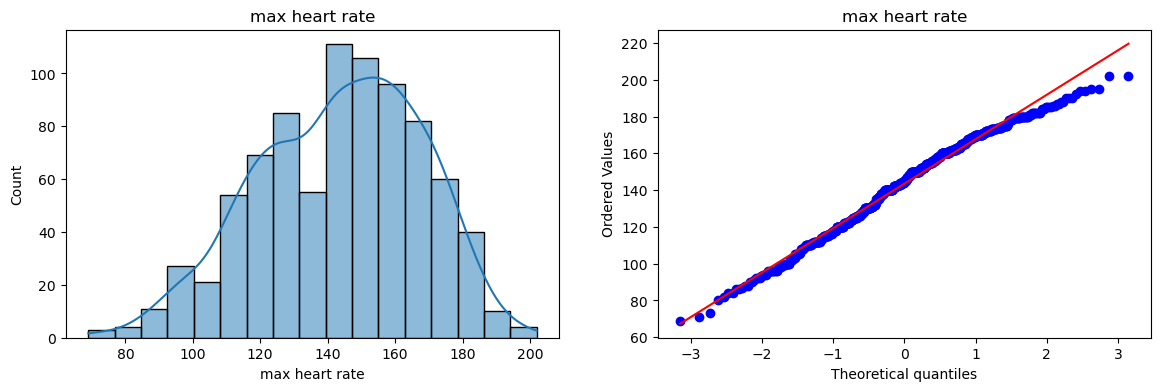

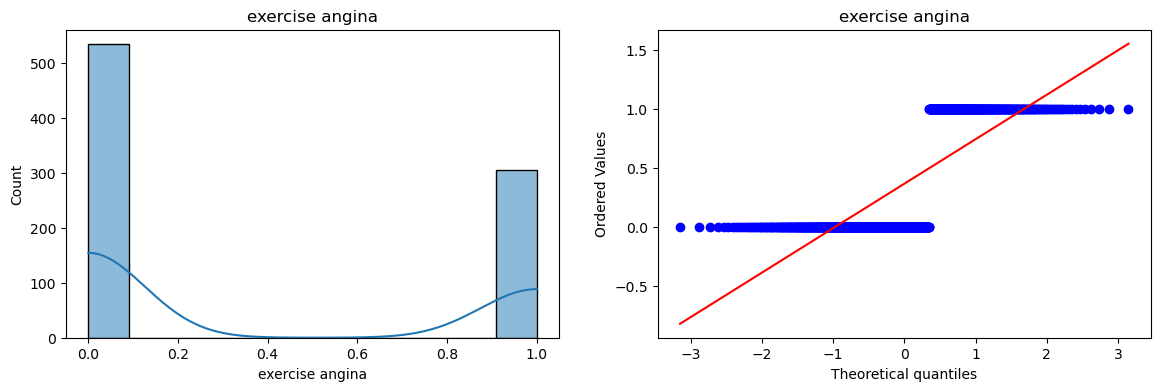

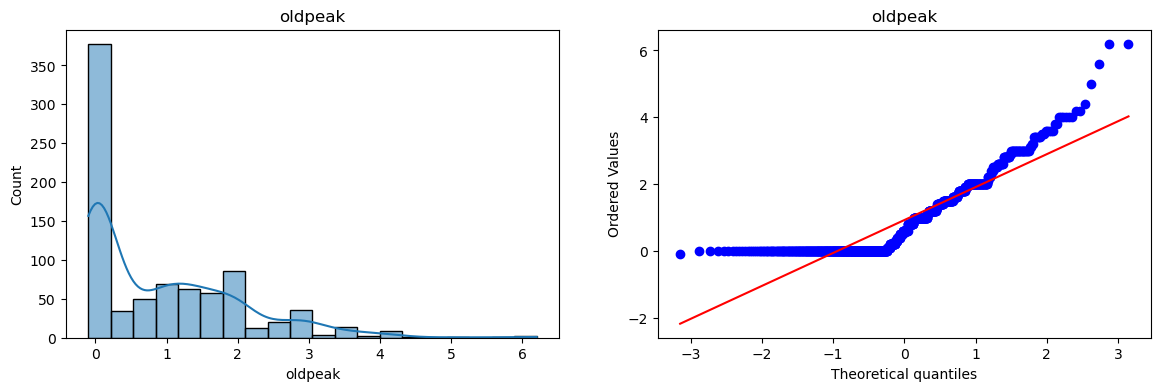

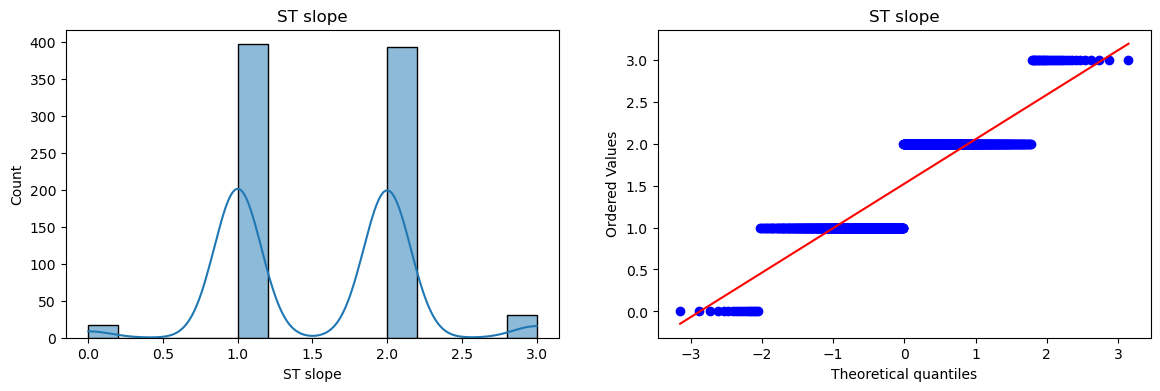

In [9]:
for col in X_train.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde = True)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist = "norm", plot = plt)
    plt.title(col)
    plt.show()

## Here we see that input features like cholesterol , Age and resting ecg follows Normal Distribution or close to normal distribution. So, here we apply standardization. While, others like 

In [11]:
# --- Step 1: Define the columns for each scaling type ---
standard_cols = ['age', 'cholesterol', 'max heart rate']
minmax_cols = ['resting bps', 'oldpeak']

# --- Step 2: Create copies of the dataframe ---
df_scaled = df_capped.copy()

# --- Step 3: Apply Standardization ---
standard_scaler = StandardScaler()
df_scaled[standard_cols] = standard_scaler.fit_transform(df_scaled[standard_cols])

# --- Step 4: Apply Min-Max Scaling ---
minmax_scaler = MinMaxScaler()
df_scaled[minmax_cols] = minmax_scaler.fit_transform(df_scaled[minmax_cols])

# --- Step 5: Preview the transformed data ---
print(df_scaled.head())

        age  sex  chest pain type  resting bps  cholesterol  \
0 -1.418599    1                2     0.615385     0.886614   
1 -0.460473    0                3     0.871795    -1.242318   
2 -1.737975    1                2     0.487179     0.769425   
3 -0.566932    0                4     0.589744    -0.578248   
4  0.071819    1                3     0.743590    -0.949346   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                    0            0        1.191145                0   
1                    0            0        0.535784                0   
2                    0            1       -1.839901                0   
3                    0            0       -1.430300                1   
4                    0            0       -0.856859                0   

    oldpeak  ST slope  target  
0  0.015873         1       0  
1  0.174603         2       1  
2  0.015873         1       0  
3  0.253968         2       1  
4  0.015873         1       

## Next thing we have to do is feature encoding (One Hot Encoding). 

In [13]:
# --- Step 1: Define your columns ---
onehot_cols = ['chest pain type', 'resting ecg']
ordinal_cols = ['ST slope']

# --- Step 2: Define the encoders ---
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids dummy trap
ordinal_encoder = OrdinalEncoder(categories=[[0,1, 2, 3]])  # 1 < 2 < 3 (Upsloping < Flat < Downsloping)

# --- Step 3: Combine them using ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, onehot_cols),
        ('ordinal', ordinal_encoder, ordinal_cols)
    ],
    remainder='passthrough'  # keep other numeric columns unchanged
)

# --- Step 4: Apply transformation ---
df_encoded = pd.DataFrame(preprocessor.fit_transform(df_scaled), columns=
    list(preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)) +
    ordinal_cols + 
    [col for col in df_scaled.columns if col not in onehot_cols + ordinal_cols]
)
df_encoded

,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_1,resting ecg_2,ST slope,age,sex,resting bps,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target
0,1.0,0.0,0.0,0.0,0.0,1.0,-1.418599,1.0,0.615385,0.886614,0.0,1.191145,0.0,0.015873,0.0
1,0.0,1.0,0.0,0.0,0.0,2.0,-0.460473,0.0,0.871795,-1.242318,0.0,0.535784,0.0,0.174603,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,-1.737975,1.0,0.487179,0.769425,0.0,-1.839901,0.0,0.015873,0.0
3,0.0,0.0,1.0,0.0,0.0,2.0,-0.566932,0.0,0.589744,-0.578248,0.0,-1.430300,1.0,0.253968,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.071819,1.0,0.743590,-0.949346,0.0,-0.856859,0.0,0.015873,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,0.0,1.0,0.0,0.0,0.0,1.0,1.562237,0.0,0.358974,-0.636842,0.0,-1.143579,0.0,0.253968,1.0
1044,0.0,1.0,0.0,1.0,0.0,1.0,-0.992766,0.0,0.205128,-2.004047,0.0,1.314025,0.0,0.111111,1.0
1045,0.0,0.0,0.0,1.0,0.0,2.0,-0.141098,1.0,0.461538,0.222543,0.0,0.740584,1.0,0.015873,0.0
1046,0.0,0.0,1.0,0.0,0.0,2.0,0.604111,1.0,0.871795,0.574110,0.0,-0.733979,0.0,0.015873,0.0


# Feature Selection.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns = ['target']),df_encoded.iloc[:,-1] ,test_size=0.2, random_state=42)

In [16]:
## Applying Apply statistical filter methods.

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

In [24]:
# 6️⃣ Apply statistical filter methods on TRAIN data only.

# ANOVA F-test.
f_selector = SelectKBest(score_func=f_classif, k=10)
f_selector.fit(X_train, y_train)
anova_features = X_train.columns[f_selector.get_support()].tolist()

# Mutual Information.
mi_selector = SelectKBest(score_func=mutual_info_classif, k=10)
mi_selector.fit(X_train, y_train)
mi_features = X_train.columns[mi_selector.get_support()].tolist()

print("\nTop 10 features (ANOVA F-test):", anova_features)
print("\nTop 10 features (Mutual Information):", mi_features)
# Here we see the top 10 features.


Top 10 features (ANOVA F-test): ['chest pain type_2', 'chest pain type_4', 'resting ecg_1', 'ST slope', 'age', 'sex', 'fasting blood sugar', 'max heart rate', 'exercise angina', 'oldpeak']

Top 10 features (Mutual Information): ['chest pain type_2', 'chest pain type_4', 'resting ecg_1', 'resting ecg_2', 'ST slope', 'sex', 'resting bps', 'fasting blood sugar', 'exercise angina', 'oldpeak']


In [25]:
# Combine selected features from both
selected_features = list(set(anova_features + mi_features))
print(f"Selected features ({len(selected_features)}): {selected_features}")

Selected features (12): ['oldpeak', 'resting bps', 'chest pain type_4', 'exercise angina', 'max heart rate', 'sex', 'ST slope', 'fasting blood sugar', 'resting ecg_1', 'chest pain type_2', 'age', 'resting ecg_2']


In [26]:
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# 8️⃣ Train Logistic Regression
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_sel, y_train)

# 9️⃣ Evaluate
y_pred = model.predict(X_test_sel)
print("\n✅ Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



✅ Model Performance:
Accuracy: 0.7857142857142857

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.75      0.78       104
         1.0       0.77      0.82      0.79       106

    accuracy                           0.79       210
   macro avg       0.79      0.79      0.79       210
weighted avg       0.79      0.79      0.79       210


Confusion Matrix:
 [[78 26]
 [19 87]]


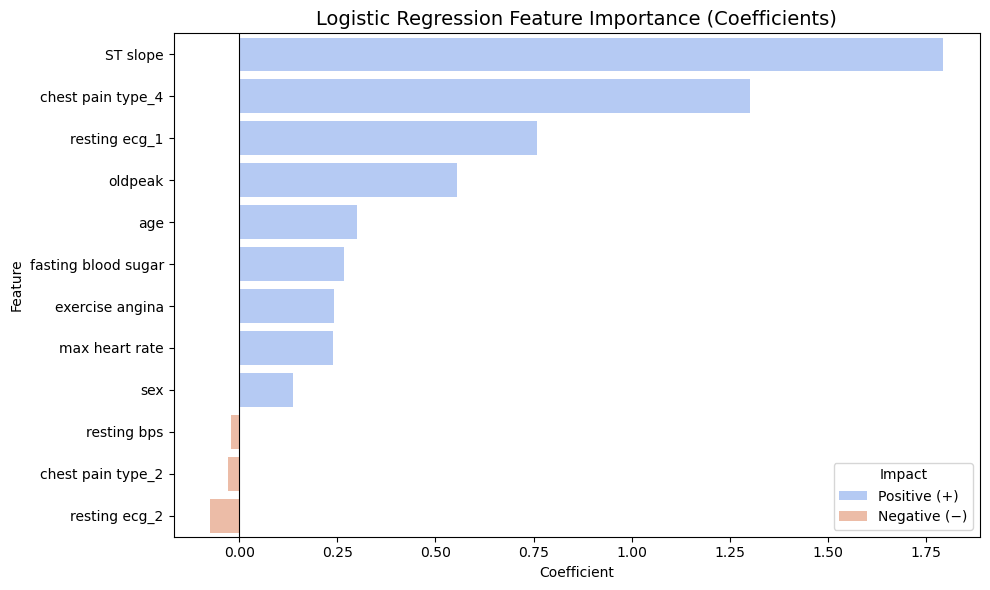

In [27]:
coef_df = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
coef_df["Impact"] = np.where(coef_df["Coefficient"] >= 0, "Positive (+)", "Negative (−)")

plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, hue = "Impact",palette="coolwarm")
plt.title("Logistic Regression Feature Importance (Coefficients)",fontsize=14)
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

In [28]:
dt = DecisionTreeClassifier(
    criterion='gini',     # or 'entropy'
    max_depth=5,          # prevent overfitting
    random_state=42
)
dt.fit(X_train_sel, y_train)

# 9️⃣ Evaluate
y_pred = dt.predict(X_test_sel)
print("✅ Model Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Model Performance:
Accuracy: 0.757

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.72      0.75       104
         1.0       0.74      0.79      0.77       106

    accuracy                           0.76       210
   macro avg       0.76      0.76      0.76       210
weighted avg       0.76      0.76      0.76       210


Confusion Matrix:
 [[75 29]
 [22 84]]


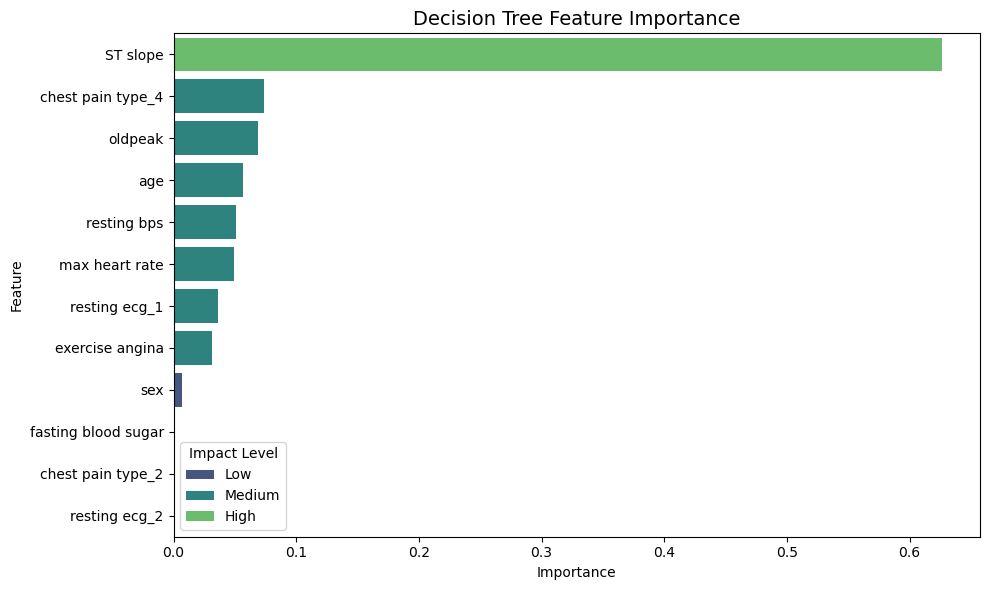

In [29]:
# 🔟 Feature Importance Plot
feat_importance = pd.DataFrame({
    "Feature": selected_features,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Add hue category based on importance strength
feat_importance["Impact Level"] = pd.cut(
    feat_importance["Importance"],
    bins=[-0.01, 0.02, 0.08, 1.0],
    labels=["Low", "Medium", "High"]
)


plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance, hue="Impact Level" ,palette="viridis")
plt.title("Decision Tree Feature Importance", fontsize=14)
plt.tight_layout()
plt.show()

In [30]:
# Train SVM model
svm_model = svm.SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

print('Accuracy of logistic regression model is ',accuracy_score(y_test,y_pred))
print('Confusion matrix of logistic regression model is \n',confusion_matrix(y_test,y_pred))
print('Classification report of logistic regression model is ',classification_report(y_test,y_pred))

Accuracy of logistic regression model is  0.7761904761904762
Confusion matrix of logistic regression model is 
 [[77 27]
 [20 86]]
Classification report of logistic regression model is                precision    recall  f1-score   support

         0.0       0.79      0.74      0.77       104
         1.0       0.76      0.81      0.79       106

    accuracy                           0.78       210
   macro avg       0.78      0.78      0.78       210
weighted avg       0.78      0.78      0.78       210



In [31]:
# 8️⃣ Train KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train_sel, y_train)

# 9️⃣ Evaluate model
y_pred = knn.predict(X_test_sel)

print("✅ Model Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Model Performance:
Accuracy: 0.719

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.66      0.70       104
         1.0       0.70      0.77      0.74       106

    accuracy                           0.72       210
   macro avg       0.72      0.72      0.72       210
weighted avg       0.72      0.72      0.72       210


Confusion Matrix:
 [[69 35]
 [24 82]]


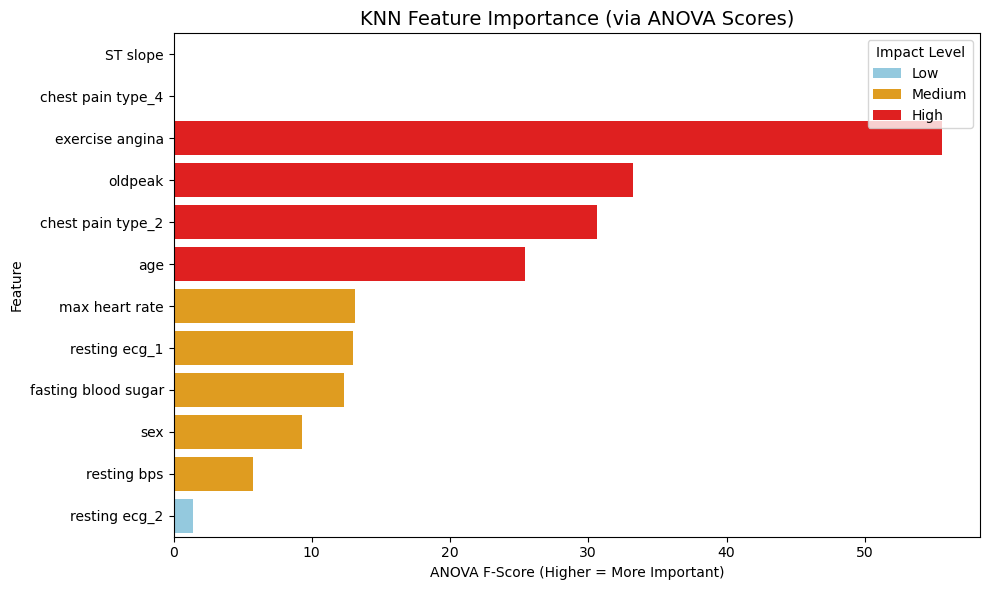

In [53]:
# 🔟 Visualize approximate feature importance using ANOVA scores (since KNN has none)
anova = SelectKBest(score_func=f_classif, k=10)
anova.fit(X_train, y_train)
anova_features = X_train.columns[anova.get_support()].tolist()


anova_scores = anova.scores_
anova_scores_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Score": anova_scores
}).sort_values(by="Score", ascending=False)

anova_scores_df = anova_scores_df[anova_scores_df["Feature"].isin(selected_features)]
anova_scores_df["Impact Level"] = pd.cut(
    anova_scores_df["Score"],
    bins=[-0.1, 5, 15, 100],
    labels=["Low", "Medium", "High"]
)
plt.figure(figsize=(10,6))
sns.barplot(
    x="Score", y="Feature", data=anova_scores_df,
    hue="Impact Level", dodge=False,
    palette={"Low": "skyblue", "Medium": "orange", "High": "red"}
)
plt.title("KNN Feature Importance (via ANOVA Scores)", fontsize=14)
plt.xlabel("ANOVA F-Score (Higher = More Important)")
plt.ylabel("Feature")
plt.legend(title="Impact Level", loc="upper right")
plt.tight_layout()
plt.show()

In [63]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_sel, y_train)

# 8️⃣ Evaluate
y_pred = rf.predict(X_test_sel)

print("\n✅ Model Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Model Performance:
Accuracy: 0.795

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.75      0.78       104
         1.0       0.77      0.84      0.81       106

    accuracy                           0.80       210
   macro avg       0.80      0.79      0.79       210
weighted avg       0.80      0.80      0.79       210


Confusion Matrix:
 [[78 26]
 [17 89]]



🔹 Tuning Logistic Regression ...
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Mean CV Accuracy: 0.7828
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78       104
         1.0       0.78      0.82      0.80       106

    accuracy                           0.79       210
   macro avg       0.79      0.79      0.79       210
weighted avg       0.79      0.79      0.79       210


🔹 Tuning Decision Tree ...
Best Parameters: {'criterion': 'entropy', 'max_depth': 3}
Mean CV Accuracy: 0.7733
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76       104
         1.0       0.76      0.82      0.79       106

    accuracy                           0.78       210
   macro avg       0.78      0.78      0.78       210
weighted avg       0.78      0.78      0.78       210


🔹 Tuning KNN ...
Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
Mean CV Accuracy: 0.7792
              precision    

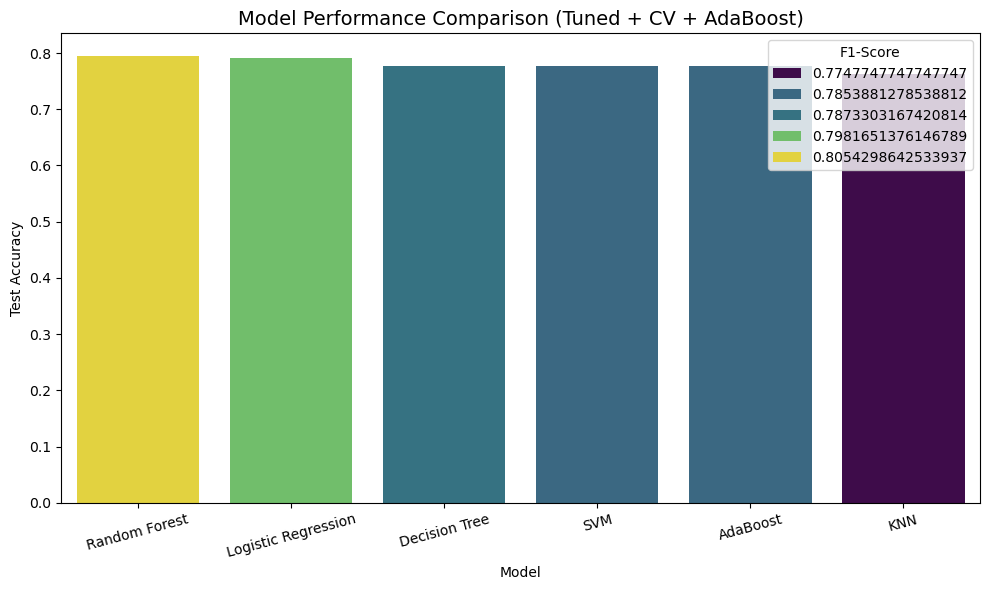

In [73]:
# 8️⃣ Define base models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# 9️⃣ Define parameter grids for GridSearchCV
param_grids = {
    "Logistic Regression": {"C": [0.1, 1, 10], "solver": ["lbfgs", "liblinear"]},
    "Decision Tree": {"max_depth": [3, 5, 7, 9], "criterion": ["gini", "entropy"]},
    "KNN": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf", "poly"]},
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [4, 6, 8]},
    "AdaBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1.0]}
}

# 🔟 GridSearchCV + Cross-validation
results = []

for name, model in models.items():
    print(f"\n🔹 Tuning {name} ...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_sel, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_sel)
    
    cv_scores = cross_val_score(best_model, X_train_sel, y_train, cv=5, scoring="accuracy")
    
    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "CV Accuracy": np.mean(cv_scores),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })
    
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
    print(classification_report(y_test, y_pred))

results_df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)
print("\n📊 Model Comparison After GridSearchCV:\n")
print(results_df[["Model", "Test Accuracy", "F1-Score", "CV Accuracy"]])

# 1️⃣1️⃣ Visualization
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Test Accuracy", hue="F1-Score", data=results_df, palette="viridis")
plt.title("Model Performance Comparison (Tuned + CV + AdaBoost)", fontsize=14)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()